# Importing necessary libraries and classifier algorithms

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("star_classification.csv")
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237688e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783893e+18,0.576661,5137.009660,55588.647500,449.312740
std,2.311624e+14,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324026e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237650e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995190e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237660e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844140e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237660e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614885e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237670e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332142e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.240000e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412690e+19,7.011245,12547.000000,58932.000000,1000.000000


In [5]:
data_resample = data
data_resample.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

# Visualizing data

Text(0.5, 1.0, 'Records per class')

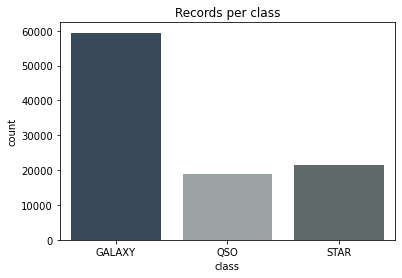

In [6]:
ax = sns.countplot(x="class", data=data_resample, palette=['#34495E',"#99A3A4", "#5F6A6A"])
star = data[data['class']=='STAR']
galaxy = data[data['class']=='GALAXY']
qso = data[data['class']=='QSO']
galaxy = data_resample.sample(qso['class'].count())
ax.set_title('Records per class')

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(data=data_resample, x="u", hue="class", kde=True, color="purple", ax=axs[0, 0])
sns.histplot(data=data_resample, x="g", hue="class", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_resample, x="r", hue="class", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=data_resample, x="i", hue="class", kde=True, color="lime", ax=axs[1, 0])
sns.histplot(data=data_resample, x="z", hue="class", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data_resample, x="redshift", hue="class", kde=True, color="yellow", ax=axs[1, 2])
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.violinplot(x="class", y="u", data=data_resample, ax=axs[0, 0])
sns.violinplot(x="class", y="g", data=data_resample, ax=axs[0, 1])
sns.violinplot(x="class", y="r", data=data_resample, ax=axs[0, 2])
sns.violinplot(x="class", y="i", data=data_resample, ax=axs[1, 0])
sns.violinplot(x="class", y="z", data=data_resample, ax=axs[1, 1])
sns.violinplot(x="class", y="redshift", data=data_resample, ax=axs[1, 2])
plt.show()

In [ ]:
X = df.drop(['class'], axis=1).values
y = df['class'].values

# Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 100000
Total # of sample in train dataset: 60000
Total # of sample in validation dataset: 20000
Total # of sample in test dataset: 20000


In [16]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=300, max_features='log2', class_weight={'GALAXY': 1, 'QSO': 10, 'STAR': 1}),
    'Neural Nets': MLPClassifier(alpha=1e-5,  max_iter=400, random_state=23, hidden_layer_sizes=(150,125,100,75), activation = 'relu', solver='adam'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'SupportVectorMachine': SVC()
}

modelNames = ['RandomForestClassifier', 'Neural Nets', 'DecisionTreeClassifier', 'LogisticRegression', 'SupportVectorMachine']
trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    
    print(f'{m}') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

    validation_score = model.score(X_valid, y_valid)
    print(f'Validation score of trained model: {validation_score*100}')
    validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")
    
    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)

    print(f'Confussion Matrix: \n{conf_matrix}\n')

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
    print("")
   
    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

C:\Users\Acer\AppData\Local\Temp/ipykernel_23368/3120895284.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier
Train score of trained model: 100.0
Validation score of trained model: 59.22500000000001
Test score of trained model: 97.53500000000001
 
Confussion Matrix: 
[[11686   271     4]
 [  131  3468     0]
 [   87     0  4353]]

Accuracy : 0.9741578812033942
Precision: 0.9275207274672372
Recall   : 0.963601000277855
F1 score : 0.9452166802943581
Specificity : 0.977335452036464

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11961
         QSO       0.93      0.96      0.95      3599
        STAR       1.00      0.98      0.99      4440

    accuracy                           0.98     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



############################################################################





C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Neural Nets
Train score of trained model: 99.43833333333333
Validation score of trained model: 21.495
Test score of trained model: 96.19
 
Confussion Matrix: 
[[11504   320    39]
 [  204  3416     0]
 [  196     3  4318]]

Accuracy : 0.9660709660709661
Precision: 0.9143468950749465
Recall   : 0.943646408839779
F1 score : 0.9287656334964656
Specificity : 0.972936400541272

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11863
         QSO       0.91      0.94      0.93      3620
        STAR       0.99      0.96      0.97      4517

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



############################################################################



DecisionTreeClassifier
Train score of trained model: 100.0
Validation score of trained model: 34.47
Test score of trained model: 96.545
 

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression
Train score of trained model: 93.35166666666666
Validation score of trained model: 59.22500000000001
Test score of trained model: 93.32000000000001
 
Confussion Matrix: 
[[11343   349   421]
 [  279  3387     2]
 [  282     3  3934]]

Accuracy : 0.9591092590181013
Precision: 0.9065845824411135
Recall   : 0.9238952536824877
F1 score : 0.915158065387733
Specificity : 0.9701505302771125

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.95      0.94      0.94     12113
         QSO       0.91      0.92      0.91      3668
        STAR       0.90      0.93      0.92      4219

    accuracy                           0.93     20000
   macro avg       0.92      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000



############################################################################





C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SupportVectorMachine
Train score of trained model: 96.20333333333333
Validation score of trained model: 21.495
Test score of trained model: 96.0
 
Confussion Matrix: 
[[11553   352    91]
 [  107  3381     0]
 [  244     6  4266]]

Accuracy : 0.9701812512180862
Precision: 0.9057058665952317
Recall   : 0.9693233944954128
F1 score : 0.9364353967594515
Specificity : 0.9704325913481731

Classification Report: 
              precision    recall  f1-score   support

      GALAXY       0.97      0.96      0.97     11996
         QSO       0.90      0.97      0.94      3488
        STAR       0.98      0.94      0.96      4516

    accuracy                           0.96     20000
   macro avg       0.95      0.96      0.95     20000
weighted avg       0.96      0.96      0.96     20000



############################################################################



